In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# Training Models

* **Closed Form equation :** directly computes the model parameters that best fit the model to the training set 


* **Iterative optimization approach :** called Gradient Descent that gradually tweaks the model parameters to minimize the cost functionover the training set

## Linear Regression Model

<h2>$\hat{y} = h_{\theta}(x) = \theta^T . x $</h2>

with :  
$\theta$ : model's parameter vector  
$\theta^T$ : transpose of  $\theta$  
$x$ : instance's feature vector  
$h_{\theta}$ : hypothesis function

The model is parametrized by the vector $\theta$

### The normal Equation - (closed form equation)

To find the value of $\theta$ that minimizes the cost function, there is a <i>closed-form solution</i> - in other words, a mathematical equation that gives the result directly. Called the **Normal Equation**.

<h2>$\hat{\theta} = (X^T.X)^{-1}.X^T.y$</h2>

with :  
$\hat{\theta}$ : value of $\theta$ that minimizes the cost function  
**y** : is the vector of target values containing y1 to ym

(0.0, 2.0, 0.0, 15.0)

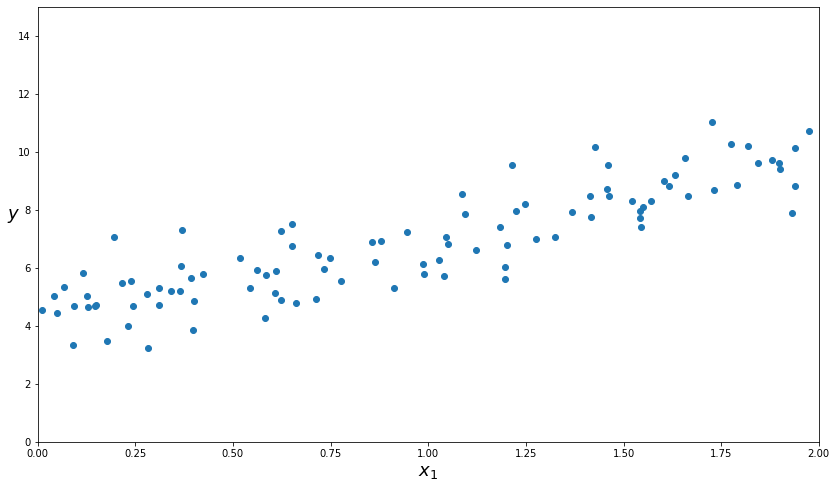

In [3]:
# generate linear looking data to test the equation
X = 2*np.random.rand(100,1)
y = 4 + 3*X +np.random.randn(100,1) # 4x + 3 + gaussian noise

plt.figure(figsize=(14,8))
plt.scatter(X,y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])


In [4]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for $\theta_0$ = 4 and $\theta_1$ = 3. But instead we got 4.215 and 2.77, cause of the noise that made it impossible to recover the exact parameters of the original function.

We make predictions using $\theta_0$ :

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Plotting the model's prediction :

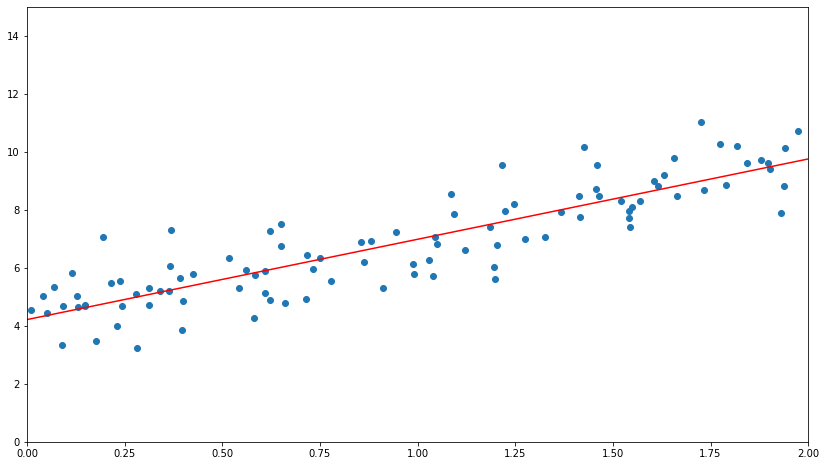

In [11]:
plt.figure(figsize=(14,8))
plt.scatter(X,y)
plt.axis([0, 2, 0, 15])
plt.plot(X_new,y_predict,color='red')

In [17]:
# EQUIVALENT CODE USING SCIKIT LEARN
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print()
print(lin_reg.predict(X_new))

[4.21509616] [[2.77011339]]

[[4.21509616]
 [9.75532293]]


### Gradient Descent - (Iterative optimization approach)

Partial derivatives of the cost function :  

<h3>$ \frac{\delta}{\delta\theta_j} = \frac{2}{m}\sum \limits_{i=1}^m (\theta^T.x^{(i)}-y^{(i)})x_{j}^{(i)}$</h3>

**N.B :** Gradient Descent scales well with the number of features; training a Linear Regression model whent there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation

In [18]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta -eta * gradients

In [19]:
theta

array([[4.21509616],
       [2.77011339]])

=> Found the same result as the Normal Equation

* Plot  Different learning rates eta : too low, ideal, too high

In [20]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

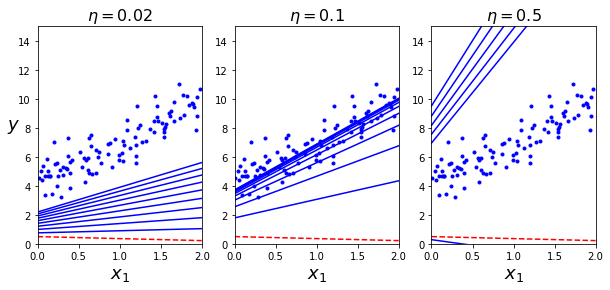

In [22]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

### Stochastic Gradient Descent

The main probelm with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.  
At the opposite extreme <i>Stochastic Gradient Descent</i> just picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes the alorithm much faster since it has very little data to manipulate at every iteration. Making it possible to train on huge training sets.  
On the other hand, due to its stochastic nature, this algorithm is much less regular : instead of gently descreasing until ut reaches the minimum, the cost function will bounce up an down, decresing only on average. Over time it will end up very close to the minimum , but once it gets there i will continue to bounce around, never settling down. So once the algorithm stops, the final paramater values are good nut not optimal.  


When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Descent has a better chance of finding the global minimum than Batch Gradient Descent.  
Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution is to gradually reduce the learning rate. <i>**simulated annealing**</i>. 

The function that determines the learning rate at each iteration is called the <i>**learning schedule**</i>. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for along time and end up with a suboptimal solution if you halt training too early.

* Code implements Stochastic Gradient Descent using a simple learning schedule :

In [31]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

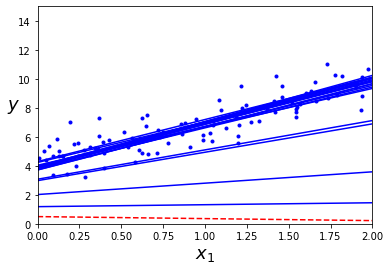

In [32]:
n_epochs = 50
t0, t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i <20:
            y_predict = X_new_b.dot(theta)
            style ="b-" if i>0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [33]:
theta

array([[4.21076011],
       [2.74856079]])

* ScikitLearn version :

In [34]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [35]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

### Mini-batch Gradient Descent

Mini-batch Gradient Descent computes the gradients on small random sets of instances called mini-batches. The main advantage of mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization matrix operations, especially when using GPUs.  
Mini Batch GD will end up walking around a bit closer to the minimum than SGD, but on the other hand it may be harder for it to escape local minima.

* Mini Batch Gradient Descent code :

In [36]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [37]:
theta

array([[4.25214635],
       [2.7896408 ]])

* **Visualization of Gradient Descent alternatives**

In [38]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

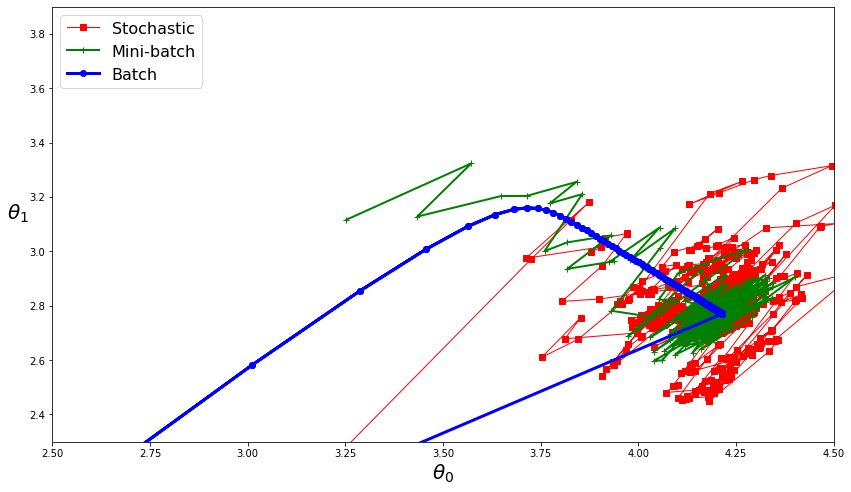

In [43]:
plt.figure(figsize=(14,8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

In [44]:
# !!! TODO : Comparative table of GD 